# CRN Modeling with MobsPy

<hr>

The course contains material derived from the course [Biological Circuit Design by Michael Elowitz and Justin Bois, 2020 at Caltech](http://be150.caltech.edu/2020/content/index.html).

The original course material has been changed by [Matthias Fuegger](http://www.lsv.fr/~mfuegger/) and [Thomas Nowak](https://www.thomasnowak.net).

This lecture covers:

**Concepts**

- The MobsPy simulation framework
- Stochastic simulation of CRNs
- Deterministic simulation of CRNs
- Noise in CRNs
- Advantages of noise in applications

<hr>

## MobsPy

MobsPy is a Python-based language to specify, simulate, and analyze CRNs. It follows a modular, object-oriented, approach, where species are grouped into meta-species and reactions into meta-reactions. For an overview see [Cravo, Függer, Nowak, Prakash. CMSB](https://hal.science/hal-03876041). There is also detailed documentation available on [readthedocs.io](https://mobspy-doc.readthedocs.io/en/latest/).

While we have already used MobsPy in the Introduction lecture to simulate basic CRNs, this writeup discusses its features in greater detail.

The Python library is available via [pypi](https://pypi.org/project/mobspy/) and [github](https://github.com/ROBACON/mobspy).
You can install it by uncommenting and running:

In [79]:
# %pip install mobspy

Let's start by including some basic MobsPy classes and plotting.

In [80]:
from mobspy import BaseSpecies, Simulation, Zero, u
import matplotlib.pyplot as plt

The most basic concept is a `BaseSpecies`. They represent the species within a CRN. Let us start with a simple model of a genetic circuit that has as input a repressor and as output GFP.

Our species are:
- Repressor molecule
- DNA that contains the circuit: each one can be in a `free` and `occupied` (by the repressor) state.
- mRNA (of GFP sequence)
- GFP

In MobsPy species are automatically named according to the variable names and can be created with a single call.
For the moment, we do not specify states of these species.

In [81]:
Repressor, DNA, mRNA, GFP = BaseSpecies()

For all species with non-zero initial values, we need to specify the value. It is good practice to set the volume at this time too.
Since, we already know that DNA can be in two states and we want it to be all initially in the `free` state, we also specify the particular state (also called characteristics) for the initial value.

While MobsPy allows also unitless volumes, counts/concentrations, and rates, it is good practice to specify all with units.
The unit registry `u` that we imported is done for this. It behaves like a `pint` unit registry, but with some adaptations for MobsPy.

In [82]:
# volume of E. coli
volume = 1 * u.femtoliter

# Let us assume a design on a plasmid with copy number 10
# and all are in free initially
DNA.free(10 / volume)

Next let's describe the reactions and their rates.

Reactions are written as `A + ... >> B + ... [rate constant]`.

For the moment we will use only mass-action kinetics. For ODE semantics this is just the product of all reactant concentrations times a rate constant. This rate constant is specified within `[]`.

In [83]:
# repression
DNA.free + Repressor >> DNA.occupied [1.0  * volume / u.min]
DNA.occupied >> DNA.free + Repressor [1.0 / u.min]

# transcription
DNA.free >> DNA.free + mRNA [1.0 / u.min]

# translation
mRNA >> mRNA + GFP [1.0 / u.min]

# dilution + degradation
mRNA >> Zero [1 / (20 * u.min)]
GFP >> Zero [1 / (20 * u.min)]

Once we are done specifying the CRN, we create a `Simulation` object with all all the species that are to be simulated specified, separated by the `|` operator to indicate parallel composition.

Compiling model
Starting Simulator
Simulation is Over


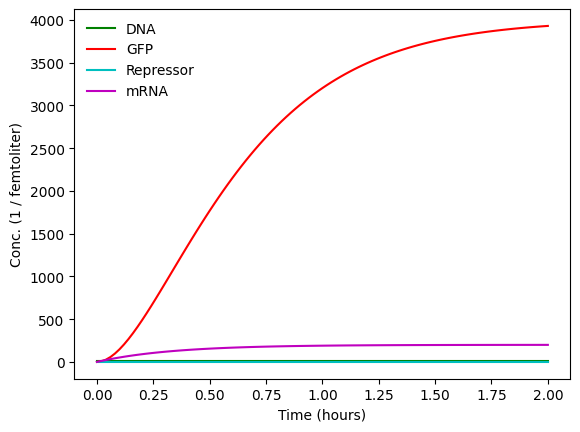

In [84]:
Sim = Simulation(DNA | mRNA | Repressor | GFP)
Sim.volume = volume
Sim.unit_y=1 / volume
Sim.run(duration= 2 * u.hour, unit_y=1 / volume, simulation_method="deterministic")

We start with a simple system of four species and reactions. The system does not yet make use of meta-species and meta-reactions. By changing the method in the code below, you can switch between a stochastic and a deterministic simulation.


In [85]:
# from mobspy import BaseSpecies, Simulation, Zero, u
# import matplotlib.pyplot as plt

# # Parameters
# duration = 24 * u.hour
# duplication_rate_const = 1/(40*u.min)
# conjugation_rate_const = 10**-9 / u.min * u.ml
# volume = 1 * u.ml
# R0 = 1e4

# # Species
# A, B, R, E = BaseSpecies()
# A(10 / u.ml)
# B(10 / u.ml)
# R(R0 / u.ml)

# A + R >> 2*A [duplication_rate_const / R0]
# B + R >> 2*B [duplication_rate_const / R0]
# A + B >> A + E [conjugation_rate_const]
# A + B >> B + E [conjugation_rate_const]

# # simulate
# S = Simulation(A | B | R | E)
# S.volume = volume
# S.save_data = False
# S.method = 'stochastic'
# # S.method = 'deterministic'
# S.duration = duration
# S.plot_data = False
# S.run(step_size=1*u.min)

# plt.plot(S.results["Time"][0], S.results["A"][0], label="A")
# plt.plot(S.results["Time"][0], S.results["B"][0], label="B")
# plt.plot(S.results["Time"][0], S.results["E"][0], label="E")
# plt.legend()

# # block
# plt.yscale('log')
# plt.show()

Note: the rest of this lecture is given on the blackboard.